## Packages

In [165]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [49]:
from scipy.stats import t, f

## Collecting Data

In [ ]:
eurusd = yf.Ticker("EURUSD=X").history(start="2024-01-01", end="2024-02-01", interval="1d")
gbpusd = yf.Ticker("GBPUSD=X").history(start="2024-01-01", end="2024-02-01", interval="1d")
# eurusd.to_csv('../00-data/eurusd.csv')
# gbpusd.to_csv('../00-data/gbpusd.csv')

In [2]:
# apple = yf.Ticker("AAPL").history(start="2025-06-01", end="2025-06-20", interval="1d")
apple = yf.Ticker("AAPL").history(start="1996-06-01", end="1996-06-16", interval="1d")
microsoft = yf.Ticker("MSFT").history(start="1996-06-01", end="1996-06-16", interval="1d")

google = yf.Ticker("GOOG").history(start="2021-06-01", end="2025-06-16", interval="1d")
amazon = yf.Ticker("AMZN").history(start="2025-06-01", end="2025-06-16", interval="1d")

In [85]:
byd = yf.Ticker("BYDDY").history(start="2025-09-01", end="2025-09-10", interval="1d")
tesla = yf.Ticker("TSLA").history(start="2025-09-01", end="2025-09-10", interval="1d")

In [116]:
coke = yf.Ticker("COKE").history(start="2025-09-01", end="2025-09-10", interval="1d")
coke.Open.round()

Date
2025-09-02 00:00:00-04:00    117.0
2025-09-03 00:00:00-04:00    117.0
2025-09-04 00:00:00-04:00    117.0
2025-09-05 00:00:00-04:00    119.0
2025-09-08 00:00:00-04:00    121.0
2025-09-09 00:00:00-04:00    123.0
Name: Open, dtype: float64

In [117]:
pepsi = yf.Ticker("PEP").history(start="2025-09-01", end="2025-09-10", interval="1d")
pepsi.Open.round()

Date
2025-09-02 00:00:00-04:00    156.0
2025-09-03 00:00:00-04:00    148.0
2025-09-04 00:00:00-04:00    148.0
2025-09-05 00:00:00-04:00    146.0
2025-09-08 00:00:00-04:00    146.0
2025-09-09 00:00:00-04:00    141.0
Name: Open, dtype: float64

In [126]:
pepper = yf.Ticker("KDP").history(start="2025-09-01", end="2025-09-10", interval="1d")
pepper.Open.round()

Date
2025-09-02 00:00:00-04:00    29.0
2025-09-03 00:00:00-04:00    28.0
2025-09-04 00:00:00-04:00    29.0
2025-09-05 00:00:00-04:00    29.0
2025-09-08 00:00:00-04:00    28.0
2025-09-09 00:00:00-04:00    27.0
Name: Open, dtype: float64

In [127]:
monster = yf.Ticker("MNST").history(start="2025-09-01", end="2025-09-10", interval="1d")
monster.Open.round()

Date
2025-09-02 00:00:00-04:00    62.0
2025-09-03 00:00:00-04:00    62.0
2025-09-04 00:00:00-04:00    64.0
2025-09-05 00:00:00-04:00    64.0
2025-09-08 00:00:00-04:00    62.0
2025-09-09 00:00:00-04:00    63.0
Name: Open, dtype: float64

## Ordinary Least Squares OLS

Linear regression is a fundamental statistical technique used to model the relationship between a dependent variable (also known as the response or target variable) and one or more independent variables (also known as predictors or features). 

The **Gauss-Markov theorem** states 
that **Ordinary Least Squares (OLS)** estimators 
are the **best linear unbiased estimators (BLUE)** 
in a linear regression model, 
meaning they have the minimum variance among all linear unbiased estimators.

### Hypothesis Testing

In [138]:
from scipy.stats import t, f

In statistics, a test of significance is a method of reaching a conclusion to either reject or accept certain claims based on the data. 

In the case of regression analysis, it is used to determine whether an independent variable is significant in explaining the variance of the dependent variable.

$$y = \beta x + \alpha$$

* The **null hypothesis H0** would be: $\beta=0$ i.e predictor $x$ is not able to explain the variance of the independent variable $y$.
* Alternative hypothesis **H1** would be: $\beta\neq 0$ i.e $x$ is significant in predicting the value of $y$.

#### t-Distribution

In [ ]:
# Define degrees of freedom
df = 3 # For a sample size of 30 (n-1)

In [5]:
# Calculate PDF at a specific value
x_val = 1.5
pdf_value = t.pdf(x_val, df)
print(f"PDF at x={x_val}: {pdf_value}")

PDF at x=1.5: 0.12893966337578505


In [6]:
# Calculate CDF at a specific value
cdf_value = t.cdf(x_val, df)
print(f"CDF at x={x_val}: {cdf_value}")

CDF at x=1.5: 0.9277881519798071


In [ ]:
# Find the critical t-value for a 95% confidence interval (two-tailed)
# This means alpha/2 = 0.025 in each tail, so we look for 0.975
critical_t_value = t.ppf(0.975, df)
# Calculates the Percent Point Function (PPF), also known as the quantile function or inverse CDF. 
# This gives the value x for a given cumulative probability q.
print(f"Critical t-value for 95% CI: {critical_t_value}")

Critical t-value for 95% CI: 2.045229642132703


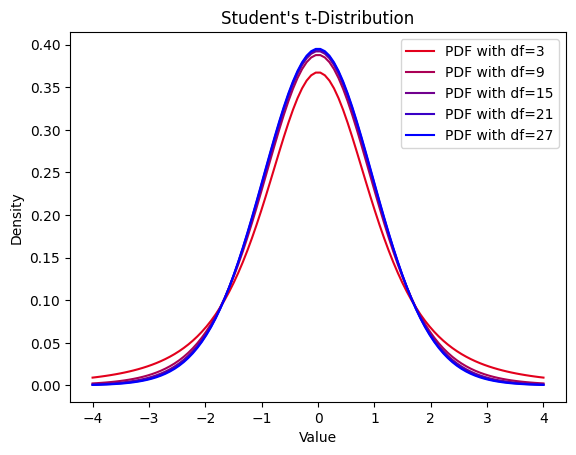

In [164]:
tvalues = np.linspace(-4, 4, 100)
dfs = np.arange(start=3, stop=30, step=6)

for df in dfs:
    plt.plot(tvalues, t.pdf(tvalues, df),  color=(1 - df/np.max(dfs), 0, df/np.max(dfs)), label=f"PDF with df={df}")
    # plt.plot(tvalues, t.pdf(tvalues, 7), color='green', label='PDF')
plt.title("Student's t-Distribution")
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

#### F-statistics

Since here we have only one predictor a **T-test** should be enough. 
However, in reality, our model is going to include a number of independent variables. 
This is where **F-statistic** comes into play.

An insignificant **F-test** implies that the predictors have no linear relationship with the target variable.

**F-statistics** is based on the ratio of two variances: the explained variance ($(\hat{y}-\bar{y})$ due to the model) and the unexplained variance ($(y-\bar{y})$ residuals). 
In other words, **F-statistics** compares the explained variance (due to the model) and the unexplained variance (residuals). 
By comparing these variances, **F-statistics** helps us determine whether the regression model significantly explains the variation in the dependent variable or if the variation can be attributed to random chance.

The **F-statistic** follows an **F-distribution**, and its value helps to determine the probability (**p-value**) of observing such a statistic if **the null hypothesis** is true 
(i.e., no relationship between the dependent and independent variables). 
If the **p-value** is smaller than a predetermined significance level (e.g., 0.05), the null hypothesis is rejected, 
and we conclude that the regression model is statistically significant.

In [166]:
pdf_value = f.pdf(1.2, dfn=10, dfd=20)
print(f"PDF at 1.2: {pdf_value}")

PDF at 1.2: 0.5626124566227062


In [170]:
cdf_value = f.cdf(14.87, dfn=1, dfd=3)
print(f"CDF at 14.87: {cdf_value}")
print(f"1-CDF at 14.87: {1-cdf_value}")


CDF at 14.87: 0.9691877617925359
1-CDF at 14.87: 0.03081223820746415


In [178]:
critical_value = f.ppf(0.9691877, dfn=1, dfd=3)
print(f"96.91877th percentile: {critical_value}")

96.91877th percentile: 14.869976997349806


In [179]:
random_samples = f.rvs(dfn=1, dfd=3, size=5)
print(f"Random samples: {random_samples}")

Random samples: [0.08597943 0.55072304 0.1722799  0.64293949 2.4631295 ]


* `dfn`: Degrees of freedom for the numerator (often associated with the variance of the group means in ANOVA).
* `dfd`: Degrees of freedom for the denominator (often associated with the variance within groups in ANOVA).

In [ ]:
# f
f(1, 3).ppf(0.99)

* If the **p-value** associated with the **F-statistic** is ≥ 0.05: Then there is no relationship between ANY of the independent variables and Y
* If the **p-value** associated with the **F-statistic** < 0.05: Then, AT LEAST 1 independent variable is related to Y

In **F-test** hypothesis testing for linear regression, the **F-statistic** is primarily assessed by comparing it against a critical value from the **F-distribution**, based on the model’s and error’s degrees of freedom and a chosen significance level, like 0.05. 

Additionally, the **p-value** associated with the **F-statistic**, typically calculated using statistical software, plays a key role; if it’s below the significance threshold, it indicates the model’s statistical significance, leading to the rejection of the null hypothesis.

##### Simple

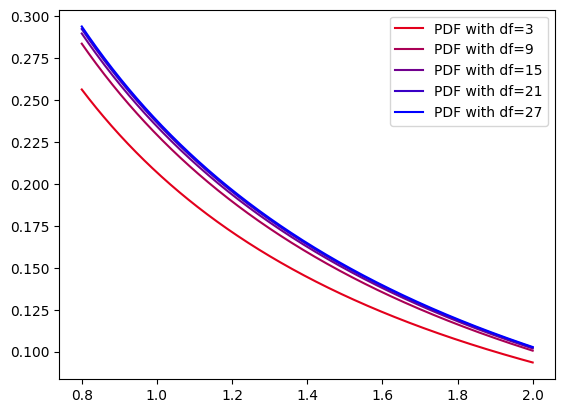

In [205]:
fvalues = np.linspace(0.8, 2, 500)

dfs = np.arange(start=3, stop=30, step=6)

for df in dfs:
    pvalues = f.pdf(fvalues, dfn=1, dfd=df)
    plt.plot(fvalues, pvalues,  color=(1 - df/np.max(dfs), 0, df/np.max(dfs)), label=f"PDF with df={df}")

# plt.plot(fvalues, pvalues)
plt.legend()
plt.show()

##### Generalized

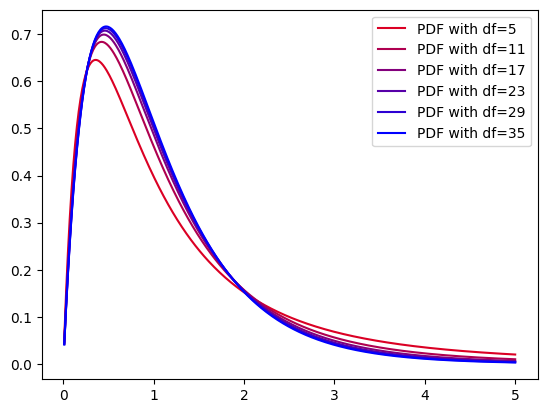

In [206]:
fvalues = np.linspace(0.01, 5, 500)

dfs = np.arange(start=5, stop=40, step=6)

for df in dfs:
    pvalues = f.pdf(fvalues, dfn=4, dfd=df)
    plt.plot(fvalues, pvalues,  color=(1 - df/np.max(dfs), 0, df/np.max(dfs)), label=f"PDF with df={df}")

# plt.plot(fvalues, pvalues)
plt.legend()
plt.show()

### 2D Playground

In [ ]:
# x = coke.Open.round().values #.reshape(-1, 1)
# y = pepsi.Open.round().values
# x = np.array([103, 127, 126, 124, 124])
# y = np.array([26, 24, 25, 26, 27]) 
# x = np.array([9, 12, 4, 3, 10])
# y = np.array([80, 82, 65, 62, 90]) 
# x = np.array([8, 10, 5, 5, 10])
# y = np.array([85, 85, 68, 65, 90]) 
x = np.array([209, 232, 259, 258, 286])
y = np.array([30, 34, 45, 35, 53]) 

In [130]:
print(f"\u03A3 xy = {np.inner(x, y)}")
print(f"\u03A3 x = {np.sum(x)}")
print(f"\u03A3 y = {np.sum(y)}")
print(f"\u03A3 x^2 = {sum([num ** 2 for num in x])}")
print(f"\u03A3 y^2 = {sum([num ** 2 for num in y])}")

Σ xy = 50001
Σ x = 1244
Σ y = 197
Σ x^2 = 312946
Σ y^2 = 8115


In [131]:
beta = (len(x)*np.inner(x, y)-np.sum(x)*np.sum(y))/(len(x)*sum([num ** 2 for num in x]) - np.sum(x)*np.sum(x))
beta

np.float64(0.2871350471094568)

In [132]:
# beta = 2.771
alpha = (np.sum(y) - beta * np.sum(x))/len(x)
alpha

np.float64(-32.039199720832855)

In [93]:
e = y - alpha - beta * x # unbiased estimate of error
sigma2 = sum([num ** 2 for num in e])/(len(x)-2)
sigma = np.sqrt(sum([num ** 2 for num in e])/(len(x)-2))

print(f"\u03A3  e^2 = {sum([num ** 2 for num in e])}")
print(f"\u03C3^2 = 1/(n-2)\u03A3 e^2 =  {sum([num ** 2 for num in e])/(len(x)-2)}")
print(f"\u03C3 = {np.sqrt(sum([num ** 2 for num in e])/(len(x)-2))}")

Σ  e^2 = 94.79740251045317
σ^2 = 1/(n-2)Σ e^2 =  31.599134170151057
σ = 5.621310716385553


In [95]:
sigma_b = np.sqrt( sigma2/sum( [ num**2 for num in (x-x.mean()) ] ) )

print(f"\u03C3^2_b = \u03C3^2 / \u03A3 (x-x_avg)^2=  {sigma2/sum( [num**2 for num in (x-x.mean())])}")
print(f"\u03C3_b =  {np.sqrt(sigma2/sum( [num**2 for num in (x-x.mean())]))}")

σ^2_b = σ^2 / Σ (x-x_avg)^2=  0.5163257217344944
σ_b =  0.7185580851500416


In [96]:
sigma_a = np.sqrt( sigma2 * sum ([num**2 for num in x]) / (len(x) * sum([num**2 for num in x-x.mean()])) )

print(f"\u03C3^2_a = \u03C3^2\u03A3 x^2/ n\u03A3 (x-x_avg)^2=  {sigma_a**2}")
print(f"\u03C3_a =  {sigma_a}")

σ^2_a = σ^2Σ x^2/ nΣ (x-x_avg)^2=  36.14280052141461
σ_a =  6.011888265879083


In [139]:
print(f"\u03C3_b = {sigma_b},    \u03C3_a = {sigma_a}")

σ_b = 0.7185580851500416,    σ_a = 6.011888265879083


In [ ]:
print(f"TSS = {sum([num**2 for num in (y-np.mean(y))])}")
print(f"RSS = {sum([num**2 for num in (beta*x+alpha-np.mean(y))])}")

In [ ]:
# 2. Add a constant to the independent variable for the intercept
# This creates the design matrix for statsmodels
X_with_intercept = sm.add_constant(x)
# 3. Create and fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X_with_intercept)
results = model.fit()
# 4. Print the detailed summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     14.87
Date:                Sat, 11 Oct 2025   Prob (F-statistic):             0.0308
Time:                        13:58:51   Log-Likelihood:                -14.450
No. Observations:                   5   AIC:                             32.90
Df Residuals:                       3   BIC:                             32.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.7386      6.012      9.105      0.0

/Users/bayan/workspace/github.com/Bayan2019/kaz-gu/.venv/lib/python3.13/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [ ]:
palpha = 0.01
print(f"{beta + t.ppf(palpha, len(x)-2)*sigma_b}, {beta - t.ppf(palpha, len(x)-2)*sigma_b}")

-0.49151692115316026, 6.034000581283879


In [ ]:
palpha = 0.01
print(f"{alpha + t.ppf(palpha, len(x)-2)*sigma_a}, {alpha - t.ppf(palpha, len(x)-2)*sigma_a}")

27.442201766312266, 82.03859823368774


### 3D Playground

In [150]:
# x = coke.Open.round().values #.reshape(-1, 1)
y = np.array([60, 36, 36, 15, 90])
x1 = np.array([40, 55, 45, 30, 30])
x2 = np.array([3, 6, 5, 3.5, 1.5])

In [151]:
x = np.array([x1, x2]) @ np.array([x1, x2]).T

In [164]:
x

array([[8450. ,  825. ],
       [ 825. ,   84.5]])

In [152]:
np.linalg.inv(x)

array([[ 0.00252994, -0.0247006 ],
       [-0.0247006 ,  0.25299401]])

In [154]:
np.linalg.inv(x) @ x

array([[1.00000000e+00, 3.05311332e-16],
       [6.10622664e-16, 1.00000000e+00]])

In [158]:
# Convert to pandas DataFrame for easier handling, especially with the formula API
df = pd.DataFrame(np.array([x1, x2]).T, columns=['x1', 'x2'])
df['y'] = y

In [179]:
x @ np.array([[169/66800, -33/1336], [-33/1336, 169/668]])

array([[ 1.00000000e+00,  2.27040609e-14],
       [-2.98372438e-16,  1.00000000e+00]])

In [176]:
np.linalg.inv(x) @ np.array([x1, x2]) @ y

array([  4.29004491, -32.8495509 ])

In [184]:
beta = np.array([[169/66800, -33/1336], [-33/1336, 169/668]]) @ np.array([x1, x2]) @ y

In [185]:
beta

array([  4.29004491, -32.8495509 ])

In [188]:
np.sqrt(sum(num**2 for num in y - np.array([x1, x2]).T @ beta)/(len(y)-2))


np.float64(10.70391178704824)

In [159]:
df

,x1,x2,y
0,40.0,3.0,60
1,55.0,6.0,36
2,45.0,5.0,36
3,30.0,3.5,15
4,30.0,1.5,90


In [170]:
# 2. Add a constant to the independent variables for the intercept term
# This is necessary when using the non-formula API (sm.OLS)
X_with_constant = sm.add_constant(df[['x1', 'x2']])

In [177]:
# 3. Fit the OLS model
# Method 1: Using the direct OLS class
model_direct = sm.OLS(df['y'], df[['x1', 'x2']])
results_direct = model_direct.fit()

In [178]:
# 4. Print the summary of the regression results
print("Results from direct OLS:")
print(results_direct.summary())

Results from direct OLS:
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              61.85
Date:                Sat, 04 Oct 2025   Prob (F-statistic):                     0.00364
Time:                        14:27:05   Log-Likelihood:                         -17.671
No. Observations:                   5   AIC:                                      39.34
Df Residuals:                       3   BIC:                                      38.56
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------

/Users/bayan/workspace/github.com/Bayan2019/kaz-gu/.venv/lib/python3.13/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [172]:
# Method 2: Using the formula API (often more convenient)
# Requires 'statsmodels.formula.api'
import statsmodels.formula.api as smf
model_formula = smf.ols("y ~ x1 + x2", data=df)
results_formula = model_formula.fit()

In [175]:
# 4. Print the summary of the regression results
print("Results from formula OLS:")
print(results_formula.summary())

Results from formula OLS:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     10.18
Date:                Sat, 04 Oct 2025   Prob (F-statistic):             0.0895
Time:                        14:25:52   Log-Likelihood:                -17.277
No. Observations:                   5   AIC:                             40.55
Df Residuals:                       2   BIC:                             39.38
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.9733     

/Users/bayan/workspace/github.com/Bayan2019/kaz-gu/.venv/lib/python3.13/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


## References

- [F-statistic: Understanding model significance using python](https://medium.com/analytics-vidhya/f-statistic-understanding-model-significance-using-python-c1371980b796)
- [F-test & F-statistics in Linear Regression: Formula, Examples](https://vitalflux.com/interpreting-f-statistics-in-linear-regression-formula-examples/)
- [Understand the F-statistic in Linear Regression](https://quantifyinghealth.com/f-statistic-in-linear-regression/)
- [P Value Calculator](https://www.graphpad.com/quickcalcs/pvalue1/)
- [F-distribution table](https://numiqo.com/tutorial/f-distribution)